# Improving Fashion Clasifications Accuracy using Convolutions

In this exercise, we are using **Fashion MNIST Data Set** and **Convolutions**.

## Load training and testing data

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [1]:
import tensorflow as tf
from os import path, getcwd, chdir
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

AttributeError: module 'tensorflow' has no attribute 'ConfigProto'

## Normalazing & Reshape

In [2]:
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0

test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

The training data and testing data needed to reshaped because the first convolution expects a single tensor containing everything, so instead of 60000 28x28x1 item in a list, we have a single 4D list that is 60000x28x28x1.

3


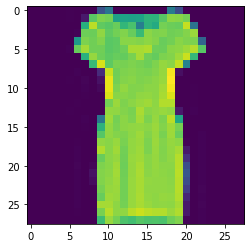

In [3]:
import matplotlib.pyplot as plt

plt.imshow(training_images[20])
print(training_labels[20])

## Making model

The first layer is the convolutions layer with 64 filters and (3,3) filter shape. The second layer is the pooling layer with (2,2) shape.

In [4]:
model  = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

## Compiling & training

In [5]:
model.compile(optimizer=tf.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 112s 60ms/step - loss: 0.6024 - accuracy: 0.7767
Epoch 2/5
1875/1875 [==============================] - 130s 69ms/step - loss: 0.3024 - accuracy: 0.8904
Epoch 3/5
1875/1875 [==============================] - 112s 60ms/step - loss: 0.2517 - accuracy: 0.9082
Epoch 4/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.2160 - accuracy: 0.9195
Epoch 5/5
1875/1875 [==============================] - 117s 62ms/step - loss: 0.1856 - accuracy: 0.9313


## Testing

In [6]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 7s 23ms/step - loss: 0.2634 - accuracy: 0.9014


[0.2633627653121948, 0.9014000296592712]